<a href="https://colab.research.google.com/github/sautiw/Numerical-Methods/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Part 5
Saurabh Tiwari

Salin Giri

Rahul Gauli



Gauss-Jordan algorithm from previous project

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

## Direct Method

Polynomial interpolation is a procedure that finds a unique polynomial of a degree n passing through the point n+1 in an x and y plane. The x-y plane relies on points sharing some relationship which in turn lead to the formation of shapes such as a curve, a parabola, and even a basic straight line. Graphs are plotted through the connection of different points on the x-y plane. Interpolation is a method used in statistics to estimate an unknown variable based on known values. Using the Gauss-Jordan elimination algorithm to solve linear systems, we can apply this algorithm in solving polynomials of a certain degree. The first steps involve creating an augmented matrix from the polynomial function under evaluation. Doing so allows us to create a linear system whose matrix values can be easily solved then corresponding x and y values can be plotted on a graph. The direct spline method is simple and efficient when provided with minimal data values for interpolation. These values can be simple data points associated with a function chosen for evaluation. However, this method fails when it comes to interpolating many points from noisy data. The linear spline is an improvement that can spline such complex functions. Linear Splines rely on chosen intervals for several points intended to be plotted. These intervals are easy to define based on the nature of the function used.

Create an augmented matrix M

The points $(1,1)$,$(2,5)$,$(3,2)$,$(3.2,7)$ and $(3.9,4)$ are used for this example.  

In [ ]:
N = 5
x = np.array([1,2,3,3.2,3.9])
y = np.array([1,5,2,7,4])

Next add the vector y values

In [ ]:
M = np.column_stack([x**k for k in range(0,N)])
print(M[:5,:5])

[[  1.       1.       1.       1.       1.    ]
 [  1.       2.       4.       8.      16.    ]
 [  1.       3.       9.      27.      81.    ]
 [  1.       3.2     10.24    32.768  104.8576]
 [  1.       3.9     15.21    59.319  231.3441]]


Compute the vector a of coeficients using the gauss-jordan function and solve

In [ ]:
gaussJordan(M)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Solve the polynomial to get plot variables

In [ ]:
X = la.solve(M,y)
print(X)

[-358.62779991  739.72783579 -509.9353936   144.18150261  -14.34614488]


In [ ]:
data =[[1,1],[2,5],[3,2],[3.2,7],[3.9,4]]

Use a direct spline function

In [ ]:
def direct_spline(data, v):
  c = la.solve(M,y)
  val = 0
  for i in range(len(c)):
    val = val + c[i]*v**i
  return val


In [ ]:
direct_spline(data,2)

4.999999999999972

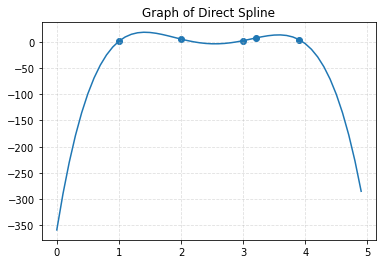

In [ ]:
x = np.arange( 0,5,.1)

plt.scatter(np.array(data)[:,0],np.array(data)[:,1])
plt.plot(x,direct_spline(data,x))
plt.grid(alpha=.4,linestyle='--')
plt.title('Graph of Direct Spline')

plt.show()

The above technique only works for 5 or more unique points. This is possible through altering value of N forming the matrix on first cell.



##Linear Splines

The function considered for this project is $f(x) = \cos x$ with an interval of between 0 and $2\pi$.

Evenly distribute points based on interval chosen


In [ ]:
fn = np.cos
N=7
lower_limit=0
upper_limit=2*np.pi

arr=[]
a=(upper_limit-lower_limit);
d=a/(N-1)
for k in range(N):
  arr.append([lower_limit + k*d,fn(lower_limit+k*d)])
M=np.array(arr)


In [ ]:
def slope(pointInitial,pointFinal):
  return (pointFinal[1]-pointInitial[1])/(pointFinal[0]-pointInitial[0])

Define the spline algorithm to aid in estimating the chosen function $f(x) = \cos x$

In [ ]:
def linerSpline(arr,input):
  x = arr[:,0]
  y = arr[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(arr[i,:],arr[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
linerSpline(M,1)

0.522535170724314

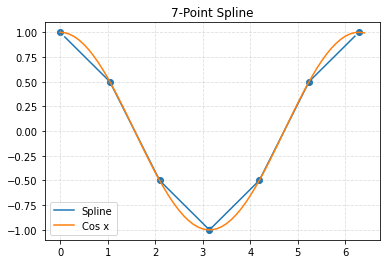

In [ ]:
x = np.arange(0,6.5,0.1)
y = [linerSpline(M,x) for x in x]

plt.scatter(M[:,0],M[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('7-Point Spline')
plt.grid(alpha=.4,linestyle='--')
plt.legend(['Spline','Cos x'])


plt.show()

For 24 points

In [ ]:
fn = np.cos
N=24
lower_limit=0
upper_limit=2*np.pi

arr=[]
a=(upper_limit-lower_limit);
d=a/(N-1)
for k in range(N):
  arr.append([lower_limit + k*d,fn(lower_limit+k*d)])
M=np.array(arr)

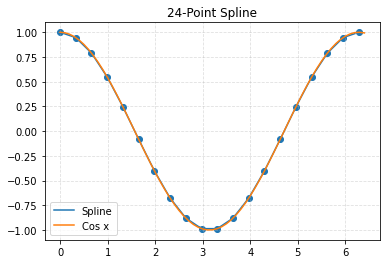

In [ ]:
x = np.arange(0,6.5,0.1)
y = [linerSpline(twentypoints,x) for x in x]
plt.scatter(twentypoints[:,0],twentypoints[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('24-Point Spline')
plt.grid(alpha=.4,linestyle='--')
plt.legend(['Spline','Cos x'])

plt.show()

The splines created here work with defined intervals that aid in correctly plotting the graphs created. The interval chosen is based on the function been a Cosine. Such functions return different points forming a curve when evaluated. As such, the splines created rely on a relatively guessed interval based on the nature of the function. Though these splines can interpolate a large number of points, they greatly rely on the programmer choosing a sufficient enough interval for which the different points are to lie. For a point that lies midway between two of my chosen points, the point would be ignored by the spline if it does not lie in the path between the two chosen points. The position of the point based on the path chosen for interpolation greatly matters.

For linear splines, the interval chosen determines the boundaries for the points generated through our spline algorithm. As such, points returned through evaluation of the function must lie within chosen boundaries. These boundaries form the window in which the plotted graph appears. In the case where a point might appear far outside the chosen window, this would likely mean that there is an error in the evaluation of the function chosen. Furthermore, the interval chosen for the case might not be the best one to give correct results. However, if a point is still within the interval but the chosen window is not big enough to include it on the plot, the best solution for this would be to adjust the window size based on the point. Adjusting the window size based on the chosen points allows for the creation of a large enough window to hold all these points and perform a successful interpolation.